# Textual Analysis: Part 1
Introduction to Digital History 3/21/22

## LOAD UHQ Data

In [1]:
import pandas as pd

#Load UHQ data into a pandas dataframe
df = pd.read_excel("UHQ_FULL_EDITED.xlsx")
df

,titles,document_type,author,gender,editor,translator,journal,volume,issue,year,pages,description,article_url,text
0,I Have Shot My Betrayer: The Trial of Amanda O...,NaN,LISA OLSEN TAIT,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 8-25,NaN,https://issuu.com/utah10/docs/utah_historical_...,"It was Monday evening, September 29, 1890, abo..."
1,How Idealized Womanhood Saved Annie Bradley fr...,NaN,ALLISON EDWARDS,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 26-37,NaN,https://issuu.com/utah10/docs/utah_historical_...,"On December 8, 1906, the sixty-three-year-old ..."
2,"Mountain Common Law, Redux: The Extralegal Pun...",NaN,KENNETH L. CANNON II,male,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 38-55,NaN,https://issuu.com/utah10/docs/utah_historical_...,Violence and extralegal justice were widesprea...
3,Josie Kensler: Murder and Survival in Southern...,NaN,PAULA HUFF BRYANT,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 56-68,NaN,https://issuu.com/utah10/docs/utah_historical_...,Josephine “Josie” Kensler was a beautiful woma...
4,Organizing Farmers in Utah,NaN,MATTHEW C. GODFREY,male,NaN,NaN,Utah Historical Quarterly,89,1,2021,Pages 33-48,Charles G. Patterson and the Intermountain Ass...,https://issuu.com/utah10/docs/utah_historical_...,"In 1917, Charles G. Patterson, a Utah attorney..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,Some Use Early Utah Indian References,NaN,J. CECIL ALTER,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 55-59,"Continued from the January, 1928 issue)",https://issuu.com/utah10/docs/uhq_1928/s/50462,"UHQ Volume 2, Number 2\nApril 1928\nSOME USEFU..."
1417,"Gunnison Massacre-1853-Millard County, Utah-In...",NaN,JOSIAH F. GIBBS,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 70-79,Nearly seventy-five years have passed since th...,https://issuu.com/utah10/docs/uhq_1928/s/50466,"UHQ Volume 1, Number 3\nJuly 1928\nGUNNISON MA..."
1418,Father Escalante and the Utah Indians,NaN,J. CECIL ALTER,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 79-90,"Continuing: ""Some Useful early Utah Indian Ref...",https://issuu.com/utah10/docs/uhq_1928/s/50473,UHQ Volume 1 Number 3\nJune 1928\nFATHER ESCAL...
1419,Personal Recollections of Wash-A-Kie: Chief of...,NaN,P.L. WILLIAMS,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 105-111,"Prefatory to noting these ""recollections"" it w...",https://issuu.com/utah10/docs/uhq_1928/s/50476,"UHQ Volume 1 October, 1928 Number 4\nPERSONAL ..."


### Wordclouds

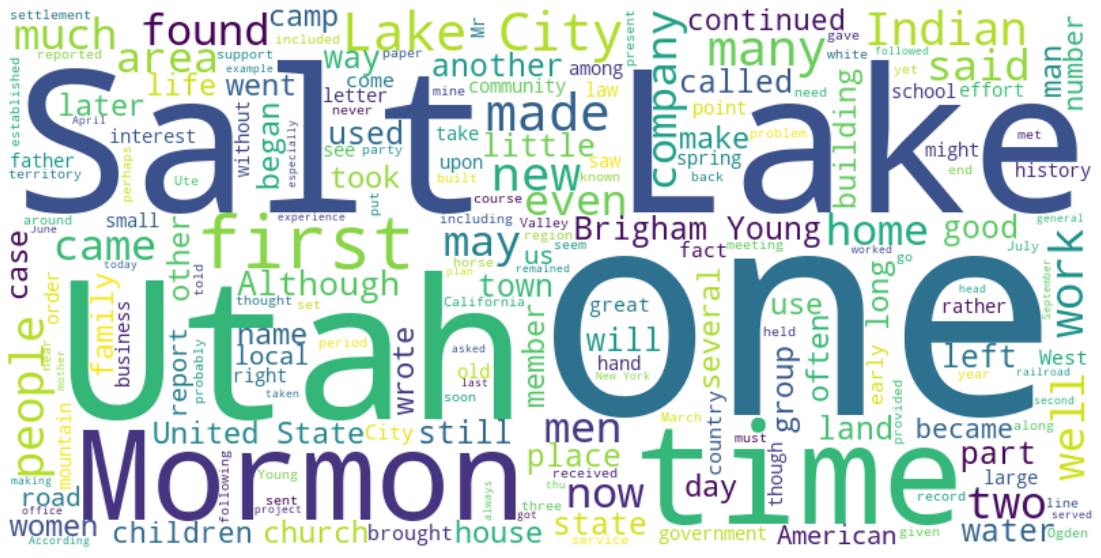

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#creating string containing all UHQ texts
df2 = df[df['text'].notna()].reset_index()

word_cloud2 = WordCloud(background_color = 'white',
                       width=800, 
                       height=400).generate(' '.join([str(elem) for elem in df2.text.tolist()]))

plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### Count length of UHQ issues

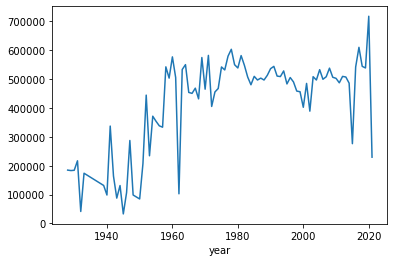

In [37]:
df['text_length'] = df['text'].str.len()
output = df.groupby(['year']).sum()
output['text_length'].plot()

### Trace word counts overtime

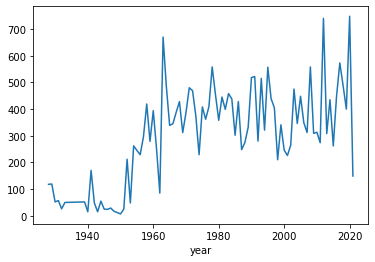

In [38]:
word = "Utah"

df['word_count'] = df.text.str.count(word)
output = df.groupby(['year']).sum()
output['word_count'].plot()

# Concordance and Collocation

In [41]:
#find word associations
from nltk import Text, tokenize

sample_text = df.text[0]

uhq_tokens = tokenize.word_tokenize(sample_text) #tokenize
uhq = Text(uhq_tokens)

word = "Utah"
uhq.concordance(word, lines=10) #concordance

Displaying 7 of 7 matches:
 woman had been tried in territorial Utah for capital murder . It featured a c
Cleveland as an associate justice of Utah and as judge of the First District ,
Washington , Powers took his seat in Utah just a few weeks later , and almost 
i-polygamy crusade and other complex Utah cases , including the Bullion-Beck m
nomination and stepped down from the Utah bench in August of that year . While
owers built an extensive practice in Utah and the West . He was in demand nati
 the murder of Arthur Brown , one of Utah ’ s first senators . The Bradley cas


In [42]:
uhq.similar(word, 10) #collocation

c hart his olson characters sex hand man seduction health


## Word Embedding

In [79]:
#word2vec
from gensim.models import word2vec
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

#Create a function that will produce a word2vec model
def word_2_vec_model(text):
    print("Tokenizing by sentence")

    sent_full = []
    
    stop = set(stopwords.words('english') + list(string.punctuation) + [".", ", ", ":", ";", "'", '"', '``',"''", '’', '“', '”'])
    
    sent = tokenize.sent_tokenize(text)
    
    for s in sent:
        word_tokens = word_tokenize(s.lower())
        filtered = []
        for w in word_tokens:
            if w not in stop:
                filtered.append(w)
        sent_full.append(filtered)
        
    print("Creating word2vec model")
    model = word2vec.Word2Vec(
        sent_full,
        vector_size=150,
        window=10,
        min_count=2,
        workers=10,
        epochs=10)
    
    return model

In [80]:
full_uhq_texts = ' '.join([str(elem) for elem in df2.text.tolist()])

full_model = word_2_vec_model(full_uhq_texts)

Tokenizing by sentence
Creating word2vec model


In [81]:
full_model.wv.index_to_key[:20]

['utah',
 "'s",
 'one',
 'would',
 'lake',
 'city',
 'salt',
 'first',
 'two',
 'new',
 'time',
 'could',
 'mormon',
 'also',
 'church',
 'years',
 'young',
 'many',
 'river',
 'made']

In [83]:
word = "mormon"
full_model.wv.most_similar(word, topn=20)

[('mormonism', 0.57038414478302),
 ('mormons', 0.5596725344657898),
 ('lds', 0.5484299063682556),
 ('mormondom', 0.4917294979095459),
 ('fenian', 0.4602719247341156),
 ('waldensian', 0.43449315428733826),
 ('mormon-', 0.41447532176971436),
 ('polygamy', 0.4050043821334839),
 ('repudiating', 0.401018351316452),
 ('anglicans', 0.3981592059135437),
 ('godbeites', 0.39549869298934937),
 ('followers', 0.3927914500236511),
 ('depopulated', 0.39257755875587463),
 ('apostates', 0.3923822045326233),
 ('theocratic', 0.38841331005096436),
 ('ecclesiastical', 0.3873654305934906),
 ('polynesian', 0.3868064880371094),
 ('campbellite', 0.38564226031303406),
 ('secular', 0.38144057989120483),
 ('protestant', 0.3811023235321045)]

# TOPIC MODELING


### Topic Modeling at the Document Level

Topic modeling at the document and paragraph levels are both deriving one single topic of a given tocument. 

In [ ]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

In [ ]:
#!pip install little_mallet_wrapper
#!pip install seaborn

In [ ]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [ ]:
df2 = df[df['text'].notna()].reset_index()
texts = df2.text.tolist()
titles = df2.titles.tolist()

training_data = []
for t in texts:
    processed_text = little_mallet_wrapper.process_string(t, numbers='remove')
    training_data.append(processed_text)

little_mallet_wrapper.print_dataset_stats(training_data)

In [ ]:
num_topics = 15

training_data = training_data

#Change to your desired output directory
output_directory_path = 'topic-model-output/UHQ'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [ ]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

In [ ]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

In [ ]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)